<a href="https://colab.research.google.com/github/honggi82/Software_application_lecture/blob/main/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 가져오기

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기

In [2]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(len(train_X), len(test_X))

11490434/11490434 [==============================] - 0s 0us/step
60000 10000


# 0번째 데이터 그려보기

5


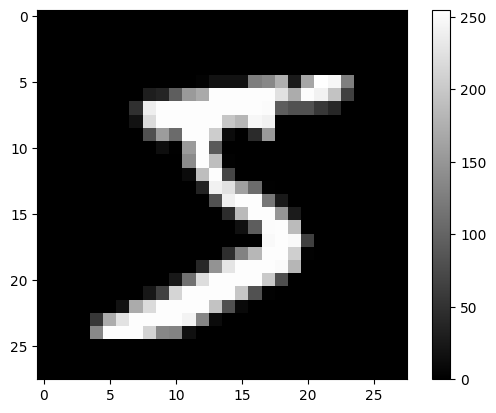

In [3]:
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
print(train_Y[0])

# 데이터 정규화

In [4]:
train_X = train_X / 255.0
test_X = test_X / 255.0

# Neural network 모델 생성

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')])
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# 모델 학습

In [6]:
history = model.fit(train_X, train_Y, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2618 - accuracy: 0.9254
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1128 - accuracy: 0.9662
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0772 - accuracy: 0.9764
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0572 - accuracy: 0.9827
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9860
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 8/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0221 - accuracy: 0.9928
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.9946
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

# 학습 결과 시각화

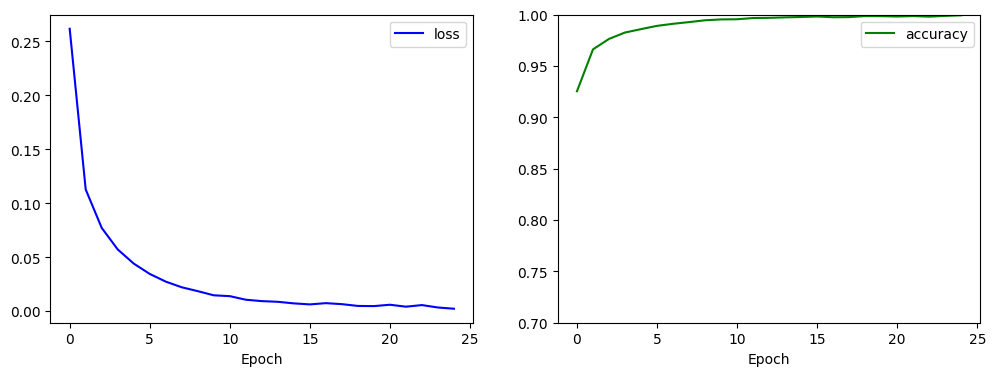

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

# 모델 평가

In [8]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.1125 - accuracy: 0.9808


[0.11247609555721283, 0.9807999730110168]